<a href="https://colab.research.google.com/github/luorix1/ML_DL-self_study/blob/main/imdb_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# output directory
output_dir = 'model_output/dense'

# train
epochs = 4
batch_size = 128

# vector space embedding
n_dim = 64
n_unique_words = 5000
n_words_to_skip = 50
max_review_length = 100
pad_type = trunc_type = 'pre'

# model structure
n_dense = 64
dropout = 0.5

In [14]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words, skip_top=n_words_to_skip)

In [15]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k, v in word_index.items()}
word_index['PAD'] = 0
word_index['START'] = 1
word_index['UNK'] = 2
index_word = {v:k for k,v in word_index.items()}

In [16]:
(all_x_train, _), (all_x_valid, _) = imdb.load_data()

In [17]:
# show example sentence
' '.join(index_word[i] for i in all_x_train[0])

"START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [19]:
# pad and cut text
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type)

In [20]:
# model
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# set checkpoint
modelcheckpoint = ModelCheckpoint(filepath=output_dir + '/weights.{epoch:02d}.hdf5')

if not os.path.exists(output_dir):
  os.makedirs(output_dir)

In [23]:
# train model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 6s 23ms/step - loss: 0.5587 - accuracy: 0.6878 - val_loss: 0.3569 - val_accuracy: 0.8404
Epoch 2/4
196/196 [==============================] - 4s 22ms/step - loss: 0.2834 - accuracy: 0.8868 - val_loss: 0.3447 - val_accuracy: 0.8465
Epoch 3/4
196/196 [==============================] - 4s 22ms/step - loss: 0.1177 - accuracy: 0.9640 - val_loss: 0.4292 - val_accuracy: 0.8310
Epoch 4/4
196/196 [==============================] - 4s 22ms/step - loss: 0.0244 - accuracy: 0.9959 - val_loss: 0.5444 - val_accuracy: 0.8296


In [24]:
# overfitting occurs after 2nd epoch

In [25]:
model.load_weights(output_dir + '/weights.02.hdf5')

In [27]:
# calculate y hat
y_hat = model.predict(x_valid)
print(y_hat)

[[0.1382691 ]
 [0.96649873]
 [0.88143826]
 ...
 [0.03607908]
 [0.02968493]
 [0.77673453]]


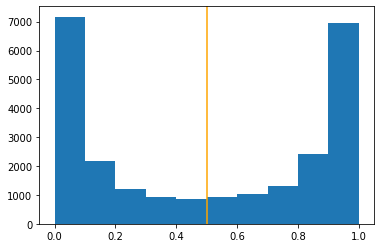

In [28]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')